In [11]:
import torch.optim as optim
from torch.utils.data import DataLoader,ConcatDataset
from torchvision.datasets import ImageFolder

In [12]:
#Adjust according to your path
import sys
sys.path.append('/orfeo/cephfs/home/dssc/acesa000/Computer_Vision_Project_Cesa/functions') #Adjust according to your path

from image_handling_functions import *
from train_test_functions import *
from neural_networks import *

In [13]:
%%capture 
#Run if you don't already have the dataset
"""
!git clone https://github.com/AlessandroCesaTs/Computer_Vision_Project_Cesa.git
"""

In [14]:
#Adjust according to your path
train_path = "/orfeo/cephfs/home/dssc/acesa000/Computer_Vision_Project_Cesa/CVPR2023_project_2_and_3_data/train"
test_path = "/orfeo/cephfs/home/dssc/acesa000/Computer_Vision_Project_Cesa/CVPR2023_project_2_and_3_data/test"

In [15]:
device = get_default_device()

In [16]:
np.random.seed(123)
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if device.type == 'cuda':
    torch.cuda.empty_cache()


In [17]:
train=ImageFolder(root=train_path,transform=resize_transformation)
test=ImageFolder(root=test_path,transform=resize_transformation)

In [18]:
#split training set into training and validation
train_size=int(0.85*len(train))
validation_size=len(train)-train_size
training_set,validation_set=torch.utils.data.random_split(train,[train_size,validation_size])

In [19]:
batch_size = 32

augmented_training_set=TransformedDataSet(training_set)
concatenated_dataset = torch.utils.data.ConcatDataset([training_set, augmented_training_set])
augmented_train_loader = DataLoader(concatenated_dataset, batch_size=batch_size,shuffle=True,pin_memory=True)

validation_loader = DataLoader(validation_set, batch_size=batch_size,shuffle=False,pin_memory=True)
test_loader = DataLoader(test, batch_size=batch_size,shuffle=False,pin_memory=True)

augmented_train_loader = DeviceDataLoader(augmented_train_loader, device)
validation_loader = DeviceDataLoader(validation_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [20]:
%%capture
#Only with data augmentation
"""
model = simpleCNN()
model.to(device)
model.apply(init_weights)
loss_function=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.0004,momentum=0.9)
"""

In [21]:
#Batch normalization, increasing convolutional support and dropour
model = CNN2()
model.to(device)
model.apply(init_weights)
loss_function=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

In [22]:
%%capture
#Ensemble
"""
model = EnsembleModel()
model.to(device)
model.apply(init_weights)
loss_function=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
"""

EPOCH1:
LOSS train: 2.5645948499441147 validation: 2.5862820148468018 | validation_accuracy: 23.11111111111111% 
EPOCH2:
LOSS train: 1.954398411512375 validation: 2.5079987049102783 | validation_accuracy: 27.555555555555557% 
EPOCH3:
LOSS train: 1.659357015788555 validation: 2.1216814517974854 | validation_accuracy: 37.333333333333336% 
EPOCH4:
LOSS train: 1.4632472738623619 validation: 3.064399003982544 | validation_accuracy: 28.444444444444443% 
EPOCH5:
LOSS train: 1.3478862524032593 validation: 2.8050732612609863 | validation_accuracy: 28.444444444444443% 
EPOCH6:
LOSS train: 1.1456578545272351 validation: 2.0957694053649902 | validation_accuracy: 48.0% 
EPOCH7:
LOSS train: 1.0834603674709797 validation: 1.9561214447021484 | validation_accuracy: 46.22222222222222% 
EPOCH8:
LOSS train: 0.9622540812939405 validation: 3.7364375591278076 | validation_accuracy: 29.333333333333332% 
EPOCH9:
LOSS train: 0.8771022066473961 validation: 2.1223948001861572 | validation_accuracy: 43.11111111111

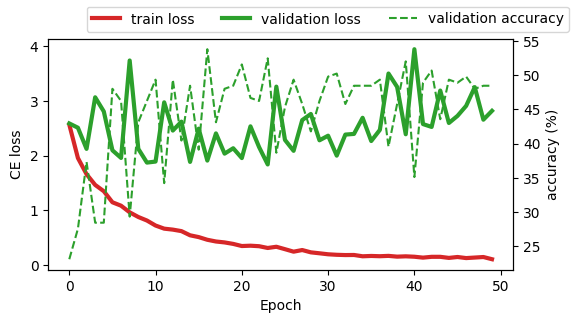

In [23]:
model_path=train_model(model,augmented_train_loader,validation_loader,loss_function,optimizer,50,device)

Accuracy of the network on the test images: 54.67336683417086%


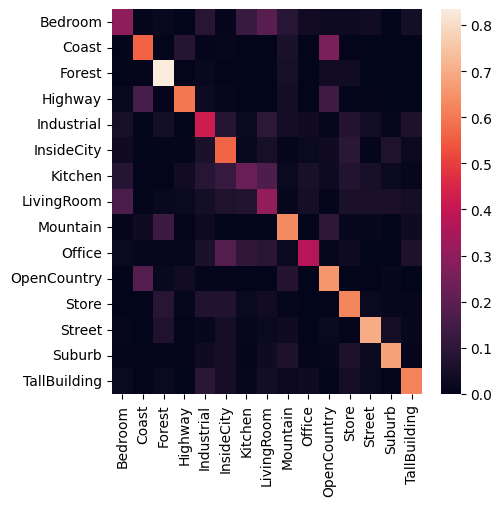

In [24]:
test_model(CNN2(),model_path,test_loader,test,device)

In [25]:
!rm model*